1

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
def exp_hist(n1, xmax1, dx1):
  n = n1
  points = n*np.random.rand(n-1,1)
  points = np.append(np.insert(np.sort(points,axis=0),0,0.),n)
  #Delta_x = np.array([[points[i]-points[i-1]] for i in range(1,len(points))])
  Delta_x_better = np.diff(points)
  xmax = xmax1
  dx = dx1
  edges = np.linspace(0,xmax,int(xmax/dx))
  counts, bins = np.histogram(Delta_x_better,bins=edges,density=True)
  #bin_centers = np.array([[(bins[i]+bins[i-1])/2] for i in range(1,len(bins))])
  plt.stairs(counts,edges)
  plt.xlabel('interval length')
  plt.ylabel('probability density')
  plt.yscale('log')
  plt.show()
  return Delta_x_better, edges, counts

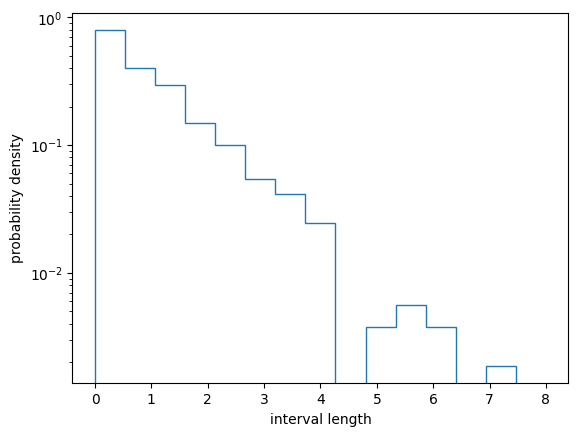

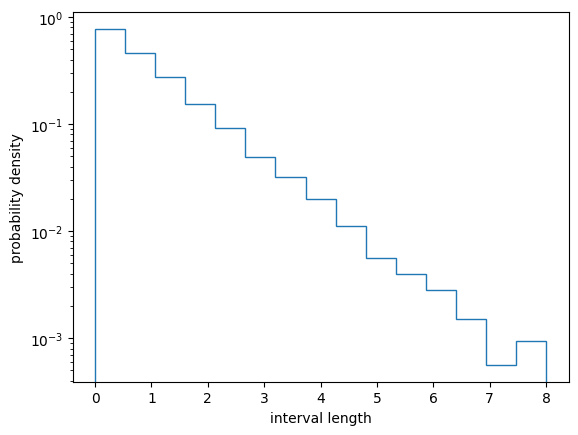

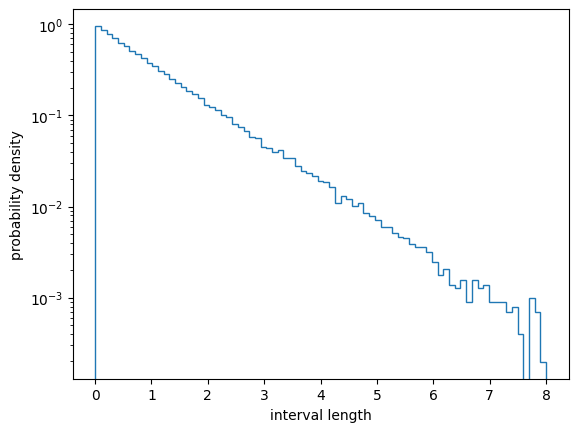

(array([0.12019893, 0.68043252, 0.56798839, ..., 1.15950061, 0.08237439,
        2.34726359]),
 array([0.        , 0.10126582, 0.20253165, 0.30379747, 0.40506329,
        0.50632911, 0.60759494, 0.70886076, 0.81012658, 0.91139241,
        1.01265823, 1.11392405, 1.21518987, 1.3164557 , 1.41772152,
        1.51898734, 1.62025316, 1.72151899, 1.82278481, 1.92405063,
        2.02531646, 2.12658228, 2.2278481 , 2.32911392, 2.43037975,
        2.53164557, 2.63291139, 2.73417722, 2.83544304, 2.93670886,
        3.03797468, 3.13924051, 3.24050633, 3.34177215, 3.44303797,
        3.5443038 , 3.64556962, 3.74683544, 3.84810127, 3.94936709,
        4.05063291, 4.15189873, 4.25316456, 4.35443038, 4.4556962 ,
        4.55696203, 4.65822785, 4.75949367, 4.86075949, 4.96202532,
        5.06329114, 5.16455696, 5.26582278, 5.36708861, 5.46835443,
        5.56962025, 5.67088608, 5.7721519 , 5.87341772, 5.97468354,
        6.07594937, 6.17721519, 6.27848101, 6.37974684, 6.48101266,
        6.58227848, 6

In [8]:
exp_hist(1000,8, 0.5)
exp_hist(10000, 8, 0.5)
exp_hist(100000,8,0.1)

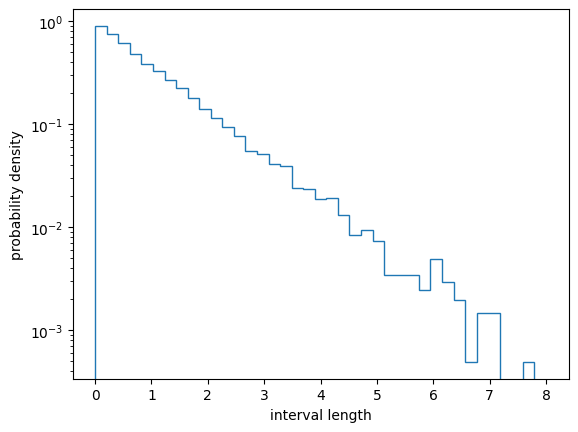

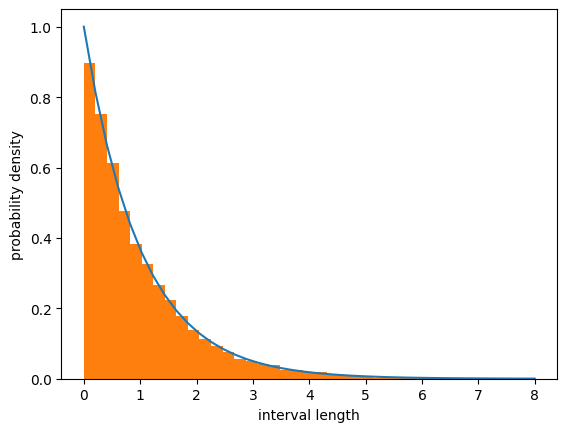

In [14]:
import scipy.stats as stats
Delta_x, edges, counts = exp_hist(10000,8,0.2)
loc, scale = stats.expon.fit(Delta_x, floc=0)
plt.plot(edges, stats.expon.pdf(edges,loc,scale))
plt.stairs(counts,edges,fill=True)
plt.ylabel('probability density')
plt.xlabel('interval length')
plt.show()


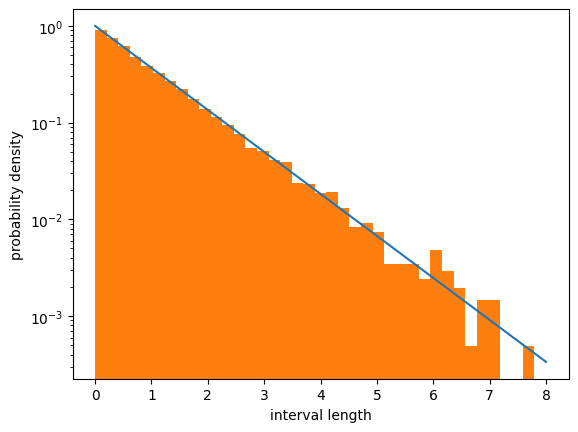

In [15]:
#Delta_x, edges, counts = exp_hist(100000,10,0.1)
#loc, scale = stats.expon.fit(Delta_x, floc=0)
plt.plot(edges, stats.expon.pdf(edges,loc,scale))
plt.stairs(counts,edges,fill=True)
plt.ylabel('probability density')
plt.xlabel('interval length')
plt.yscale('log')
plt.show()

In [17]:
stats.goodness_of_fit(stats.expon, Delta_x[:], known_params = {"loc": 0})

GoodnessOfFitResult(fit_result=  params: FitParams(loc=0.0, scale=1.0)
 success: True
 message: 'The fit was performed successfully.', statistic=0.2098694561227603, pvalue=0.9532, null_distribution=array([0.5433766 , 0.5730689 , 0.34823803, ..., 0.35097268, 0.28211649,
       0.43064724]))

2

In [23]:
#from matplotlib import animation
#from IPython.display import display, Image
from IPython.display import clear_output
def chop_n_glue(n,xmax,dx,iterations,steps_per_iter):
  n = n
  xmax = xmax
  dx = dx
  edges = 1000*np.linspace(0,xmax,int(xmax/dx))
  x = 1000*np.ones((n,1))
  fig, ax = plt.subplots()
  counts, bins = np.histogram(x,bins=edges,density=True)
  bin_centers = np.array([[(bins[i]+bins[i-1])/2] for i in range(1,len(bins))])
  plt.stairs(counts,edges)
  #scat = ax.scatter(bin_centers,counts)
  #line2 = ax.plot(t[0], z2[0], label=f'v0 = {v02} m/s')[0]
  #artists = []
  #ax.set(xlim=[0, 3.5], xlabel='lengths', ylabel='pdf')
  for frame in range(iterations):
    # for each frame, update the data stored on each artist.
    for iter in range(steps_per_iter):
      i = np.random.randint(low=0,high=n)
      j = np.random.randint(low=0,high=n)
      while (i==j):
        j = np.random.randint(low=0,high=n)
      sum1 = x[i]+x[j]
      x[i]=np.random.rand()*sum1
      x[j]=sum1-x[i]
    counts, bins = np.histogram(x,bins=edges,density=True)
    clear_output(wait=True)
    plt.figure(1)
    plt.stairs(counts,edges)
    plt.show()
    #plt.yscale('log')
    plt.ylabel('probability density')
    plt.xlabel('stick length')




In [25]:
chop_n_glue(10000,8,0.1,500,100)
#chop_n_glue(10000,5,0.1,4,8000)

KeyboardInterrupt: ignored

3

In [ ]:
def just_glue(n,xmax,dx,k):
  points = n*np.random.rand(n-1,1)
  x = np.append(np.insert(np.sort(points,axis=0),0,0.),n)
  Delta_x = np.array([[x[i]-x[i-1]] for i in range(1,len(x))])
  edges = np.linspace(0,xmax,int(xmax/dx))
  counts, bins = np.histogram(Delta_x,bins=edges,density=True)
  x2 = x[np.linspace(0,n,int((n+1)/k),dtype=int)]#?
  Delta_x2 = np.array([[x2[i]-x2[i-1]] for i in range(1,len(x2))])
  counts, bins = np.histogram(Delta_x2,bins=edges,density=True)
  bin_centers = np.array([[(bins[i]+bins[i-1])/2] for i in range(1,len(bins))])
  plt.stairs(counts,edges)
  plt.xlabel('interval length')
  plt.ylabel('probability density')

  xsym = np.linspace(0,xmax,n*100)
  plt.plot(xsym,(xsym**(k-1))*np.exp(-xsym)/np.math.factorial(k-1))
  #plt.yscale('log')
  plt.show()







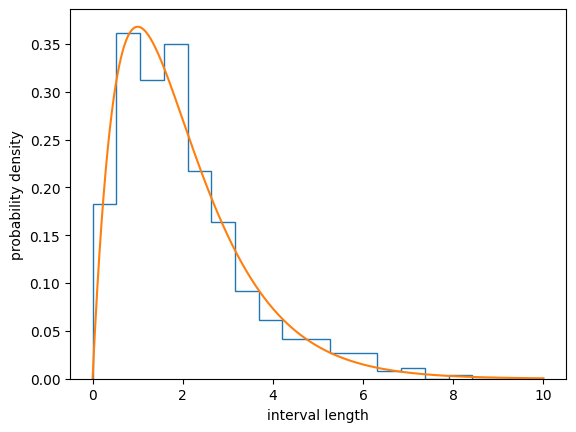

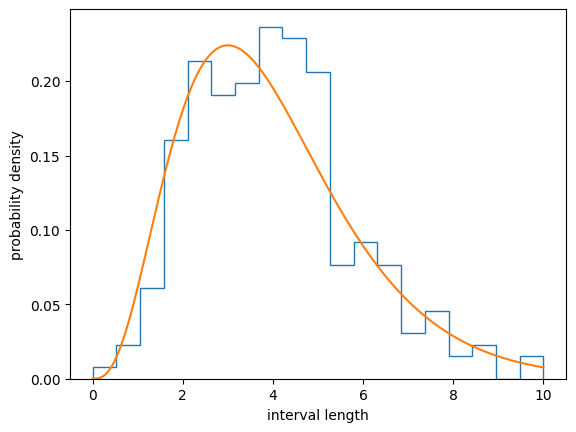

In [ ]:
just_glue(1000,10,0.5,2)
just_glue(1000,10,0.5,4)


4 - aggregation

In [ ]:
def aggregate():
  n0=10**6
  x = np.ones((n0,1))
  xmax = 25
  ymax = n0/1000
  x1 = np.linspace(0,xmax,int(xmax/0.2))
  n=n0
  niter = int(n0/100)
  niter2 = 80
  for iter2 in range(niter2):
    for iter in range(niter):
      i = np.random.randint(0,n)
      x[i] = x[i]+x[n-1]
      n=n-1
      x2 = x[:n]
    #counts,bins = np.histogram(x2,bins=xmax)
    bins = np.linspace(-0.5,xmax-0.5,xmax)
  plt.hist(x2,bins=bins,density=True)
  print(len(x2))
  #loc, scale = stats.expon.fit(x2,floc=0)
  #plt.plot(bins, n*stats.expon.pdf(bins,loc,scale))
  mu = np.mean(x2)
  print(1/mu)
  x = np.linspace(0,25,100)
  plt.plot(x, (1/mu)*((1-(1/mu))**x))
  plt.xlim(0,xmax+1)
  plt.show()


200000
0.2000002000002


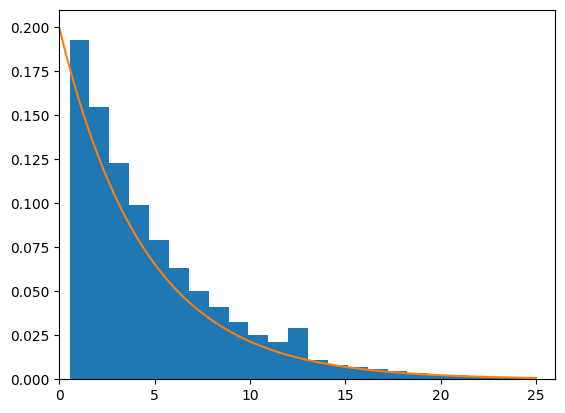

In [ ]:
aggregate()

4 - balls in the bin

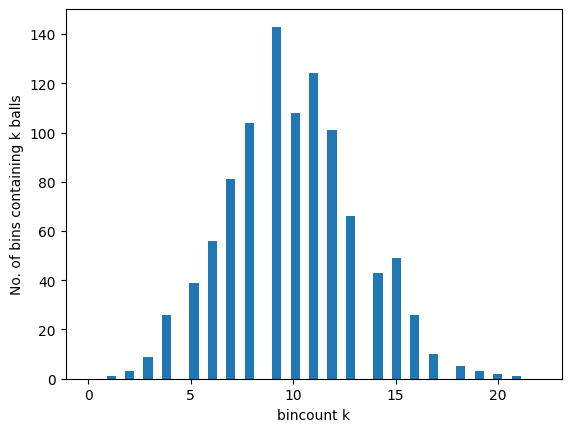

In [27]:
def throws_in_the_bin():
  nbins = 10**3
  n = 10**4
  hits = np.random.randint(0,nbins, size = n)
  k = np.zeros(nbins)
  for i in range(nbins):
    k[i] = np.shape(np.where(hits==i))[1]
  plt.figure()
  bins = np.linspace(0,np.max(k)+1)
  plt.hist(k,bins=bins)
  # counts, _ =

  #plt.hist(k)
  plt.xlabel('bincount k')
  plt.ylabel('No. of bins containing k balls')
  # print(np.shape(np.where(hits==10)))

throws_in_the_bin()

5 - recycling the balls

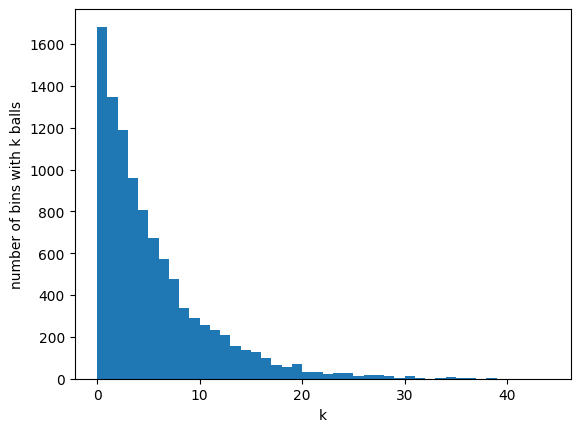

In [ ]:
from numpy.lib.index_tricks import index_exp
def recycle():
  nbins = 10**4
  n = 5 *nbins
  k = np.ones(nbins)*5
  k_max = 30
  plt.figure(1)
  bins = np.arange(np.max(k))
  plt.hist(k,bins=bins)
  plt.show()
  clear_output(wait=True)
  nsweeps=20
  for i in range(nsweeps):
    for j in range(nbins):
      idx= np.random.randint(0,nbins)
      if k[idx]>0:
        k[idx] = k[idx] - 1
        idx = np.random.randint(0,nbins)
        k[idx] = k[idx] + 1

    clear_output(wait=True)
    bins = np.arange(np.max(k))
    plt.hist(k,bins=bins)
    plt.ylabel('number of bins with k balls')
    plt.xlabel('k')
    plt.show()

recycle()